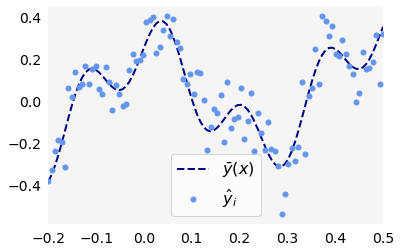

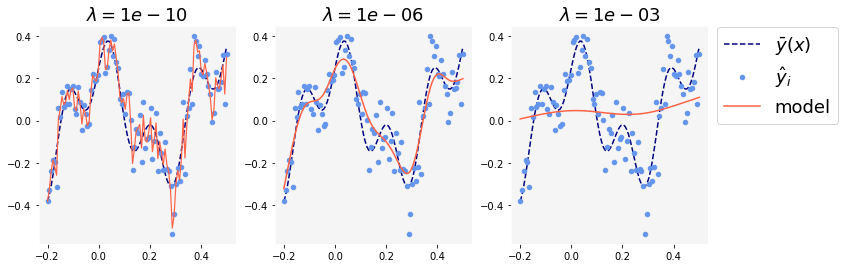

In [1]:
# %%
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.special import erfinv
import egrss 
import lambda_fun
import os


n     = 100
sigma = 0.1
a,b   = -0.2, 0.5
p = 2  #degree of splines
xi     = (b-a) ** (2 * p - 1) 
x = np.linspace(a,b,n)

# Function 
def f(x):
    return 0.25*np.cos(4*np.pi *x) + 0.15*np.sin(12* np.pi *x) + 0.2 * x

# Generate data with noise level sigma
yhat = f(x) + sigma * np.random.normal(loc = 0, scale = 1, size = x.shape)


# Plot of the true function and data 
xx = np.linspace(a,b,100)

f1 = plt.figure()
plt.plot(xx,f(xx),'--',color = 'navy',label = '$y(x)$', linewidth = 2)
plt.plot(x,yhat,'bo',color = 'cornflowerblue',markersize = 5,label = 'observations')
plt.xlim((a,b))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('x', fontsize = 14)
# plt.ylabel('y', rotation = 0, fontsize = 14)
plt.tick_params(left=False, bottom = False, right = False, top = False)
plt.legend(['$\\bar{y}(x)$', '$\hat{y}_i$'], numpoints = 1, prop = {'size': 16}, loc = 'best')
ax = plt.gca()
ax.set_facecolor('whitesmoke')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
my_path = os.getcwd()
f1.savefig(my_path + "/Plots/noisy.pdf", bbox_inches='tight')


# Plot estimate for different values of lambda

lam    = 1e-10
Ut, Vt = egrss.generators((x-a)/(b-a),p)
Wt, z  = egrss.potrf(Ut,Vt,n*lam/xi)
c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,yhat)
fig,ax = plt.subplots(1,3,figsize=(12, 4))
ax[0].plot(xx,f(xx),'--',color = 'navy', linewidth=1.5)
ax[0].plot(x,yhat,'bo',markersize = 4.5, color = 'cornflowerblue')
ax[0].plot(x,yhat-n*lam/xi*c,color = 'tomato', linewidth=1.2)
ax[0].set_title('$\lambda = {:1.0e}$'.format(lam), fontsize = 18)
ax[0].xaxis.set_visible(True)
ax[0].yaxis.set_visible(True)
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white') 
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].set_facecolor('whitesmoke')

lam    = 1e-6
Wt, z  = egrss.potrf(Ut,Vt,n*lam/xi)
c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,yhat)
ax[1].plot(xx,f(xx),'--',color = 'navy', linewidth=1.5)
ax[1].plot(x,yhat,'bo',markersize = 4.5, color = 'cornflowerblue')
ax[1].plot(x,yhat-n*lam/xi*c,color = 'tomato', linewidth=1.5)
ax[1].set_title('$\lambda = {:1.0e}$'.format(lam), fontsize = 18)
ax[1].xaxis.set_visible(True)
ax[1].yaxis.set_visible(True)
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white') 
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].set_facecolor('whitesmoke')

lam    = 1e-3
Wt, z  = egrss.potrf(Ut,Vt,n*lam/xi)
c,d    = lambda_fun.smoothing_spline_reg(Ut,Wt,z,yhat)
ax[2].plot(xx,f(xx),'--',color = 'navy', linewidth=1.5)
ax[2].plot(x,yhat,'bo',markersize = 4.5, color = 'cornflowerblue')
ax[2].plot(x,yhat-n*lam/xi*c,color = 'tomato', linewidth=1.5)
ax[2].set_title('$\lambda = {:1.0e}$'.format(lam), fontsize = 18)
plt.legend([ '$\\bar{y}(x)$','$\hat{y}_i$','model'],loc = 'upper left', numpoints = 1, prop = {'size': 18}, bbox_to_anchor=(1, 1.04))
ax[2].xaxis.set_visible(True)
ax[2].yaxis.set_visible(True)
ax[2].spines['bottom'].set_color('white')
ax[2].spines['top'].set_color('white') 
ax[2].spines['right'].set_color('white')
ax[2].spines['left'].set_color('white')
ax[2].set_facecolor('whitesmoke')
plt.show()
my_path = os.getcwd()
fig.savefig(my_path + "/Plots/lambda.pdf", bbox_inches='tight')
